# London Bike Rental Predictor Project


## Introduction

This project involves using the *London Bike Data* dataset from the *Transport for London (TfL)* and *freemeteo.co.uk* collaboration to create prediction models for *Santander Cycles (formerly Barclays Cycle Hires)*. This model will predict the bike sharing usage in each day and in each hour of the day. The recent success of the *Santander Cycles* scheme has led to increased demands and expansion in different areas of London. To aid with this growth an accurate predictor model is required.

To achieve the best results we will use **K-fold Cross-Validation** to get training and testing datasets and then run **Logistic Regression** and **Decision Tree** evaluation metrics to measure prediction accuracy and return the best results among the two.

## Code

### Initial Library Imports

In [1]:
## Import necessary packages for creating prediction models and tabulations
## Following imports are only for logistic regression and k-fold cross-validation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Import and Modification

In [2]:
df = pd.read_csv("London_bike_data.csv")

# We will change the "bike_rented" field from alphabetic category to numeric

df['bike_rented'].replace(['very low', 'low', 'medium', 'high', 'very high'], [0,1,2,3,4], inplace=True)

<ipython-input-2-a41b8180f541>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bike_rented'].replace(['very low', 'low', 'medium', 'high', 'very high'], [0,1,2,3,4], inplace=True)
<ipython-input-2-a41b8180f541>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['bike_rented'].replace(['very lo

### Viewing dataset after modification

Let us first check the head of the dataset and get an idea of what the entries look like.

In [3]:
df.head()

,id,date,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
0,8650,2016-01-01,6,3,0,1,3.0,0.0,87.0,10.0,1,0
1,9383,2016-01-31,19,3,1,0,14.0,14.0,77.0,35.0,3,1
2,12036,2016-05-22,8,0,1,0,14.5,14.5,65.0,6.5,1,1
3,2404,2015-04-14,11,0,0,0,18.0,18.0,54.0,21.5,1,2
4,7406,2015-11-09,21,2,0,0,15.0,15.0,82.0,31.5,4,2


Based on the table information we will now look at the datatypes of the given data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13060 non-null  int64  
 1   date               13060 non-null  object 
 2   hour               13060 non-null  int64  
 3   season             13060 non-null  int64  
 4   is_weekend         13060 non-null  int64  
 5   is_holiday         13060 non-null  int64  
 6   temperature        13060 non-null  float64
 7   temperature_feels  13060 non-null  float64
 8   humidity           13060 non-null  float64
 9   wind_speed         13060 non-null  float64
 10  weather_code       13060 non-null  int64  
 11  bike_rented        13060 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [5]:
df.describe()

,id,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
count,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000
mean,8699.206891,11.497320,1.488974,0.285835,0.021822,12.460784,11.512506,72.403407,15.885094,2.716309,1.992649
std,5008.757529,6.920567,1.118707,0.451828,0.146109,5.573487,6.618541,14.264575,7.883711,2.348494,1.414952
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000
25%,4365.500000,6.000000,0.000000,0.000000,0.000000,8.000000,6.000000,63.000000,10.000000,1.000000,1.000000
50%,8697.500000,12.000000,1.000000,0.000000,0.000000,12.500000,12.500000,75.000000,15.000000,2.000000,2.000000
75%,13038.250000,18.000000,2.000000,1.000000,0.000000,16.000000,16.000000,83.000000,20.500000,3.000000,3.000000
max,17414.000000,23.000000,3.000000,1.000000,1.000000,34.000000,34.000000,100.000000,56.500000,26.000000,4.000000


### Exploratory Analysis

Checking out the distribution of *"hour"* when the bikes were rented in a 24 hr cycle.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

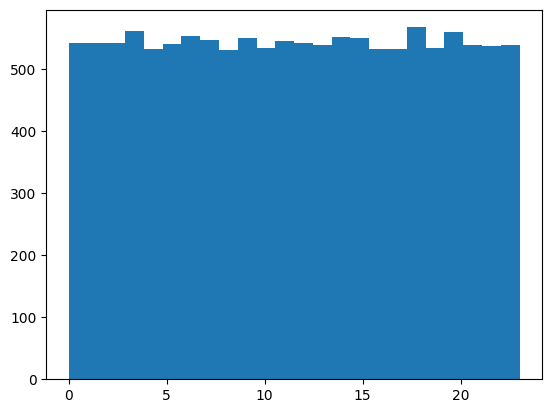

In [6]:
plt.hist(df['hour'], bins=24)
plt

Checking out the relationship between all variables of the dataset.

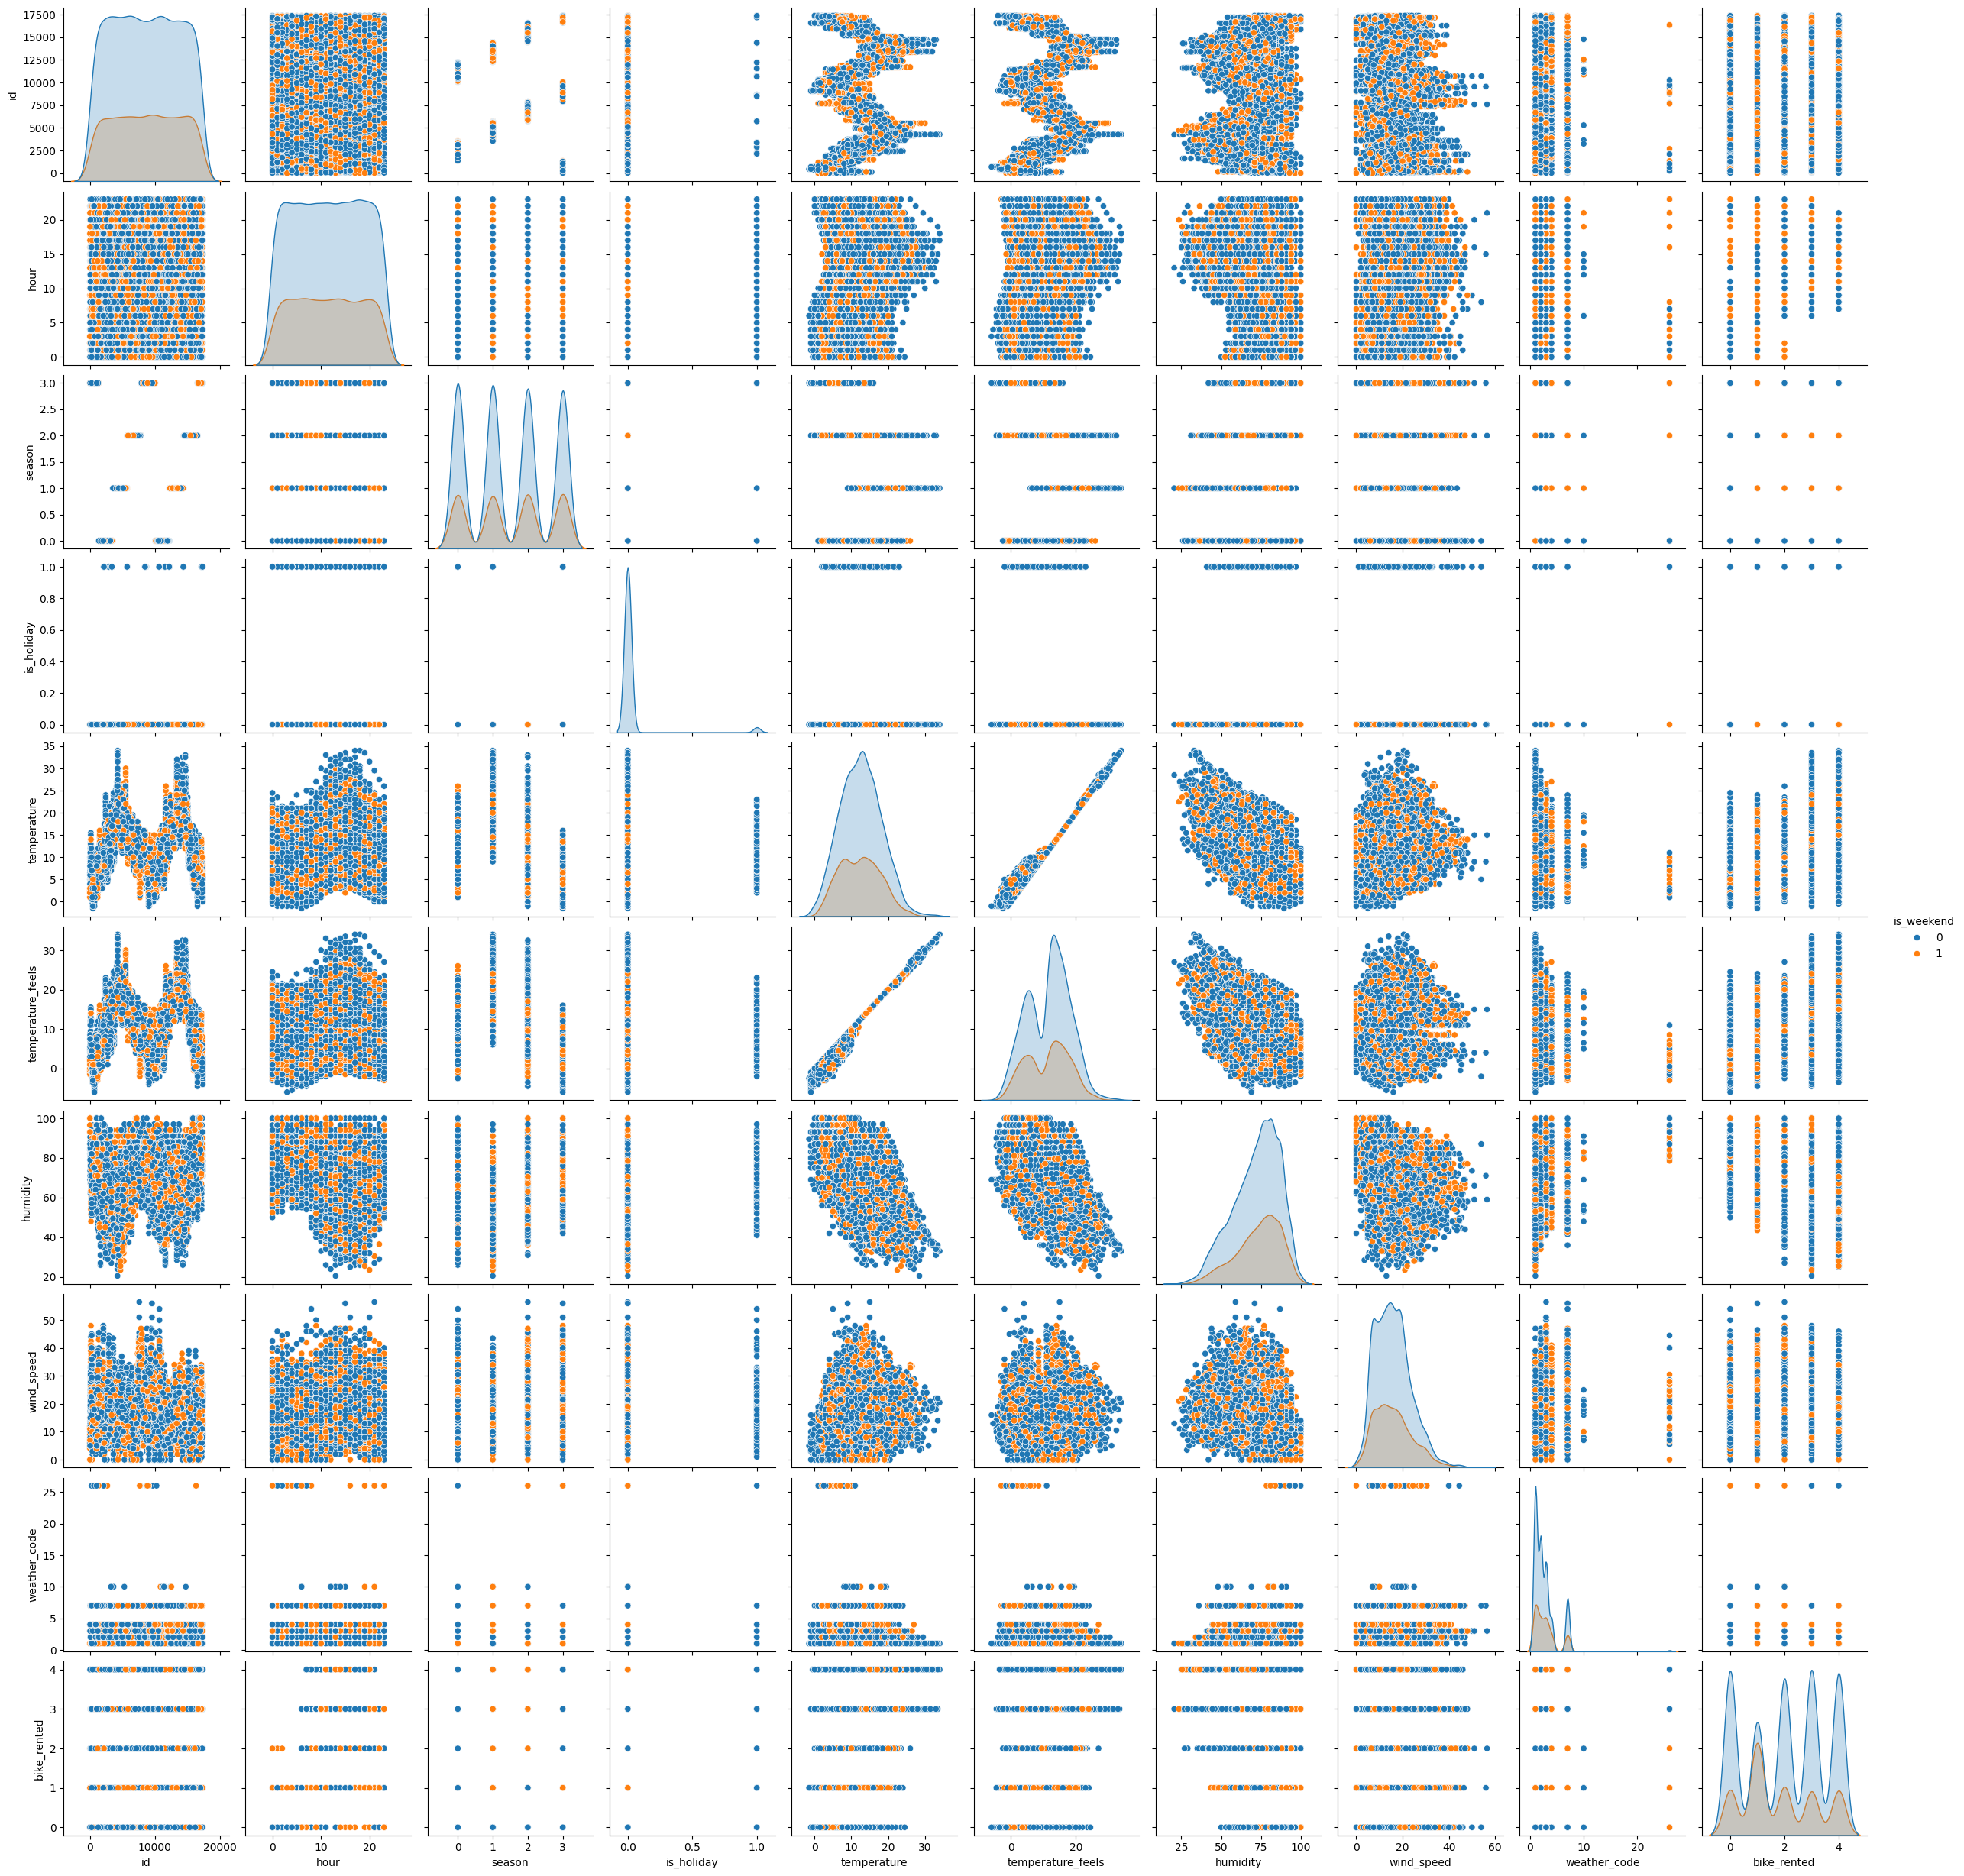

In [7]:
sns.pairplot(df, hue='is_weekend')

### Model Training

First, we will run a Logistic Regression. We will first begin with a single test to check for accuracy and decide to go further down this route.

In [8]:
df.columns

Index(['id', 'date', 'hour', 'season', 'is_weekend', 'is_holiday',
       'temperature', 'temperature_feels', 'humidity', 'wind_speed',
       'weather_code', 'bike_rented'],
      dtype='object')

Since *bike_rented* is categorical, *date* is historical information, and *id* is an identifier, we can not use them for predictions. So, we shall drop them.

In [9]:
# Splitting the dataset
X = df.drop(['bike_rented', 'date', 'id'], axis=1)
y = df['bike_rented']

In [10]:
from sklearn.model_selection import train_test_split

We will now divide the test and train sets for our dataset using varying sizes. We started with test_size=0.2 and slowly went down to 0.1 as it gave us higher accuracies.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=69)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logclf = LogisticRegression()

In [14]:
logclf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predictions = logclf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.88      0.69       222
           1       0.29      0.26      0.27       271
           2       0.36      0.35      0.36       285
           3       0.39      0.19      0.25       278
           4       0.43      0.52      0.47       250

    accuracy                           0.42      1306
   macro avg       0.41      0.44      0.41      1306
weighted avg       0.40      0.42      0.40      1306



Now, we will run *K-Fold Cross Validation* over the same data.

In [17]:
## Import Library
from sklearn.model_selection import KFold

We will create 10 splits in our K-fold model to create a 10-fold cross-validation.

In [18]:
kf = KFold(n_splits=10)

In [19]:
Accuracy=[]
# Iterate through the k-fold cross-validation splits
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the model on the training data
    logclf.fit(X_train, y_train)
    # Make predictions on the test data
    predictions = logclf.predict(X_test)
    # Calculate and print the metrics
    print('R2 score:', logclf.score(X_test, y_test))
    Accuracy.append(logclf.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.42496171516079634


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.41730474732006123


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.45252679938744256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.4203675344563553


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.4318529862174579


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.445635528330781


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.41500765696784075


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.43950995405819293


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score: 0.44716692189892804
R2 score: 0.4211332312404288


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
np.mean(Accuracy)

0.4315467075038285

Through a 10-fold *K-Fold Cross Validation* we can conclude that this model is not a good predictor so we will use an alternative approach. We will now try using **Decision Trees** in attempts to get better accuracy.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [22]:
model = DecisionTreeClassifier()

In [23]:
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(X,y,test_size=0.2, random_state=69)

In [24]:
model.fit(dt_X_train,dt_y_train)

DecisionTreeClassifier()

In [25]:
prediction = model.predict(dt_X_test)
print("Accuracy is", metrics.accuracy_score(prediction, dt_y_test))

Accuracy is 0.7626339969372129


In [26]:
from sklearn.metrics import classification_report
print(classification_report(dt_y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       492
           1       0.72      0.70      0.71       531
           2       0.67      0.65      0.66       545
           3       0.70      0.74      0.72       534
           4       0.85      0.85      0.85       510

    accuracy                           0.76      2612
   macro avg       0.77      0.77      0.77      2612
weighted avg       0.76      0.76      0.76      2612



Now, we know that *Decision Tree* method is very accurate in a single run at 10% test size, we will now try to create a K-Fold Cross Validation with 10 folds to get the same test size and run a thorough diagnostic and verify if this is correct or if there is a possibility of getting more accurate information.

In [27]:
Accuracy=[]
# Iterate through the k-fold cross-validation splits
for train_index, test_index in kf.split(X):
    kf_X_train, kf_X_test = X.iloc[train_index], X.iloc[test_index]
    kf_y_train, kf_y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    predictions = model.predict(X_test)
    # Calculate and print the metrics
    print('R2 score:', model.score(kf_X_test, kf_y_test))
    Accuracy.append(model.score(kf_X_test, kf_y_test))

R2 score: 1.0
R2 score: 1.0
R2 score: 0.9992343032159265
R2 score: 1.0
R2 score: 0.9992343032159265
R2 score: 1.0
R2 score: 1.0
R2 score: 0.9992343032159265
R2 score: 1.0
R2 score: 0.7733537519142419


In [28]:
np.mean(Accuracy)

0.9771056661562021

Performing a 10-fold *K-Fold Cross Validation* gives us a **significantly** higher r2 score which pretty much solidifies our use of a classifier for a predictor over a regressor.

## Conclusion

Through a thorough 10-fold *K-Fold Cross Validation* the *Santander Bicycle* scheme can safely use a **Decision Tree** model to get accurate predictions of bike sharing usage per hour per day as it boasts an average accuracy of 97.66% for successfully predicting bike rentals.

The *Logistical Regression* model was an initial attempt at getting useful information but it failed at predicting bike rentals with it's poor accuracy of only around 46%.

This means that a *classifier* is a better option for getting prediction information than a *regressor* with the *London Bike Data* dataset.